# Taxi Companies Analytics

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1: Open data and general information](#OpenData&GeneralInfo)
3.   [* Step 1: Conclusion](#GeneranlInfoConclusion)
4. [Step 2: Prepare the Data](#PrepareData)
5. [* To Do List](#Step2ToDoList)
6.  [* Step 2: Conclusion](#Step2Conclusion)
7. [Step 3: Testing hypotheses in Step 5](#AnalyzeData)
8.  [* Step 3: Conclusion](#Step3Conclusion)
9. [Step 4: Test the Hypotheses](#Step4Hypotheses)
10. [**Null Hypotheses](#NullHypotheses1)
11. [**Null Hypotheses Conclusion:](#NullHypotheses1Conclusion)
12. [Step 5: Write an overall conclusion](#OverallConclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  |   |
|  **Main question of project**  |  |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-analyst/courses/44b40536-c875-4106-afac-99788bbc5fb2/sprints/4234/topics/300f79e3-731f-4617-815d-4cdcde909a3f/lessons/d323e7af-51f3-435f-ab99-c98c213a75fa/)    |
| **Datasets**             | [/datasets/project_sql_result_01.csv](https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv)  |
|                          | [/datasets/project_sql_result_04.csv](https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv) |
|                          | [/datasets/project_sql_result_07.csv](https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv)|  

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [2]:
# import all packages
import pandas as pd
import numpy as np
import random
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [3]:
# connect all datasets:
df_company = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv')
df_location = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')
df_loop = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')

In [4]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [5]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include='object'))
    print('-'*110)
    
    print('Columns with nulls:')
    get_percent_of_na(df, 2)
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [6]:
def sort_desc(df, col):
    return df.sort_values(by=col, ascending=False)

In [7]:
df_company = sort_desc(df_company, 'trips_amount')
df_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [8]:
# let's use get_info function for check information for all datasets:
get_info(df_company)
get_info(df_location)
get_info(df_loop)

Head:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,company_name
count,64
unique,64
top,4053 - 40193 Adwar H. Nikola
freq,1


--------------------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
--------------------------------------------------------------------------------------------------------------
Shape:
(64, 2)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////
Head:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


,dropoff_location_name
count,94
unique,94
top,Uptown
freq,1


--------------------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
--------------------------------------------------------------------------------------------------------------
Shape:
(94, 2)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////
Head:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


,start_ts,weather_conditions
count,1068,1068
unique,81,2
top,2017-11-11 10:00:00,Good
freq,48,888


--------------------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
--------------------------------------------------------------------------------------------------------------
Shape:
(1068, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 197 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


#### Step1: Conclusion <a name="GeneranlInfoConclusion"></a>

Based on the above information: 
* We can say that there are no missing values in the datasets. Very clean data.

### Step 2. Exploratory data analysis for Step 4. <a name="PrepareData"></a>

#### To-Do List: <a name="Step2ToDoList"></a>

- [X] study the data they contain
- [X] make sure the data types are correct
- [X] identify the top 10 neighborhoods in terms of drop-offs
- [X] make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- [X] draw conclusions based on each graph and explain the results

In [9]:
# convert start_ts column to datetime format from dataframe df_loop
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts'])

<AxesSubplot:xlabel='average_trips'>

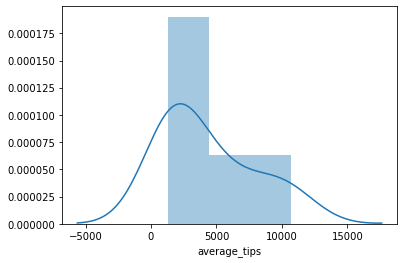

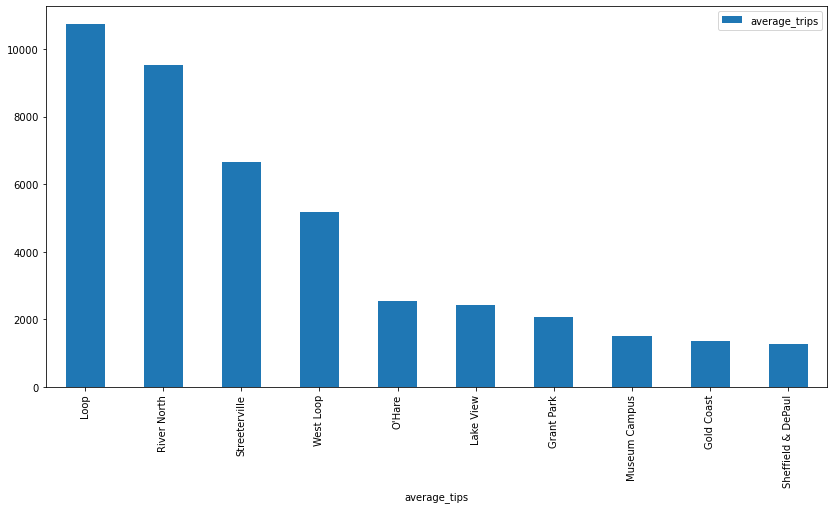

In [13]:
# check and we will determine the 10 top in terms of drop-offs.
display(sns.distplot(df_location.head(10)['average_trips']))
plt.xlabel('average_tips')
df_location.head(10).plot.bar(x='dropoff_location_name', figsize=(14,7))
plt.xlabel('average_tips')
plt.show()

Description of graphs for average_trips:
> * According to the graph, activity places: Loop/River North, Streetville/West Loop.

<AxesSubplot:xlabel='trips_amount'>

<AxesSubplot:title={'center':'Avg Trips per Company'}, xlabel='company_name'>

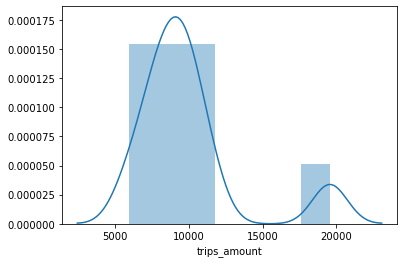

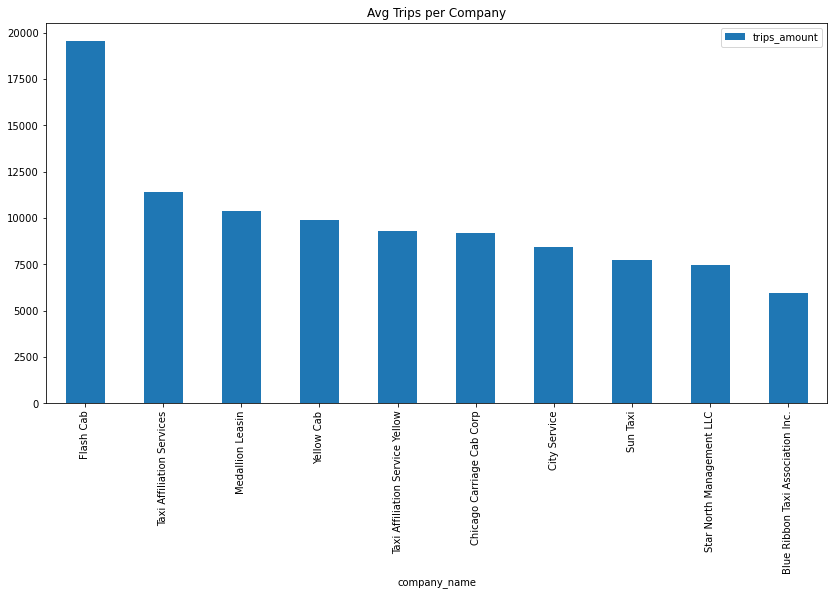

In [15]:
display(sns.distplot(df_company.head(10)['trips_amount']))
df_company.head(10).plot(kind='bar', x='company_name', figsize=(14,7), title='Avg Trips per Company')

Description of graphs for company_name:
> * Taxi company Flash Cab significantly ahead of all other companies.

### Step 2: Conclusion <a name="Step2Conclusion"></a>

> * Loop/River North, Streetville/West Loop - the most popular areas for taxi rides.
> * A Flash Cab taxi company is ranked first in terms of the number of transports among other companies.

### Step 3. Testing hypotheses in Step 5 <a name="AnalyzeData"></a>

> - [x] The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.".

**Explain:**

> - [X] How you formulated the null and alternative hypotheses.
- [X] What criterion you used to test the hypotheses and why.

#### Null Hypotheses: <a name="NullHypotheses1"></a>

* The first Null Hypotheses: 

> The average duration of rides from the Loop to O'Hare Internation Airport changes on rainy Saturdays.

* Alternative Hypotheses:

> The average duration of rides from the Loop to O'Hare Internation Airport does not changes on rainy Saturdays.

In [19]:
display(df_loop.head())
df_loop['start_ts'].dt.weekday.unique()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


array([5], dtype=int64)

In [17]:
df_good = df_loop[df_loop['weather_conditions'] == 'Good']
df_bad  = df_loop[df_loop['weather_conditions'] == 'Bad']

In [25]:
df_good.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [27]:
print('For good weather, duration time mean value:', df_good['duration_seconds'].mean())
print('For bad weather, duration time mean value:', df_bad['duration_seconds'].mean())

For good weather, duration time mean value: 1999.6756756756756
For bad weather, duration time mean value: 2427.2055555555557


In [22]:
# define function for check hypotheses:
def test_hypotheses(pattern_1, pattern_2):
    alpha   = .05
    results = st.ttest_ind(pattern_1, pattern_2, equal_var=False)

    print('pvalue:', results.pvalue)
    print('alpha:', alpha)
    if results.pvalue < alpha:
        print('Decision: We reject the null hypotheses')
    else:
        print('Decision: We cannot reject the null hypotheses')

In [28]:
# for check hypotheses upload patterns for Good and Bad weather:
test_hypotheses(df_good['duration_seconds'], df_bad['duration_seconds'])

pvalue: 6.738994326108734e-12
alpha: 0.05
Decision: We reject the null hypotheses


#### Null Hypotheses Conclusion: <a name="NullHypotheses1Conclusion"></a>

> * Based on the fact that the Null hypothesis was **REJECTED**, it can be **CONFERMED** that the alternative hypothesis that "The average duration of rides from the Loop to O'Hare Internation Airport **DOES NOT** changes on rainy Saturdays"

### Step 5. Write an overall conclusion <a name="OverallConclusion"></a>

> * Loop/River North, Streetville/West Loop - the most popular areas for taxi rides.
> * A Flash Cab taxi company is ranked first in terms of the number of transports among other companies.
> * Average travel times from Loop to O'Hare International Airport do NOT change during bad Saturday weather.